<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Overview of Pyleoclim: Efficient & Flexible Timeseries Analysis

## Authors

Deborah Khider1, Julien Emile-Geay2, Alexander James2, Feng Zhu3

1 Information Sciences Institute, University of Southern California 2 Department of Earth Sciences, University of Southern California 3 Nanjing University of Information Science and Technology

Author1 = {"name": "Deborah Khider", "affiliation": "Information Sciences Institute, University of Southern California", "email": "khider@usc.edu", "orcid": "0000-0001-7501-8430"}
Author2 = {"name": "Julien Emile-Geay", "affiliation": "Department of Earth Sciences, University of Southern California", "email": "julieneg@usc.edu", "orcid": "0000-0001-5920-4751"}
Author3 = {"name": "Alexander James", "affiliation": "Department of Earth Sciences, University of Southern California", "email": "akjames@usc.edu", "orcid": "0000-0001-8561-3188"}
Author4 = {"name": "Feng Zhu", "affiliation": "Nanjing University of Information Science and Technology", "email": "fzhu@nuist.edu", "orcid": "0000-0002-9969-2953"}

## Preamble

### Goals:

* Get acquainted with the Pyleoclim package, namely the objects and their associated methods
* Learn to create a Series object from a csv file
* Call the default methods for plotting, spectral and wavelet analysis.
* Construct workflows with Pyleoclim


**Reading Time:**

10 minutes

### Keywords

Visualization; Signal Processing; Spectral Analysis; Wavelet Analysis; Method Cascading

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Pandas; Matplotlib

## Data Description

Sea-surface temperature from [Kaplan (1998)](https://psl.noaa.gov/data/gridded/data.kaplan_sst.html) averaged over the NINO3 (5N-5S, 150W-190E)) region.


## Demonstration

Let's import the packages needed for this tutorial:

In [1]:
import pyleoclim as pyleo
import pandas as pd

### Step 1: Load a Series object from a csv file

To do so, we will first read the data from a csv file and load into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [2]:
df = pd.read_csv('../data/wtc_test_data_nino_even.csv')
df

,t,air,nino
0,1871.000000,87.36090,-0.358250
1,1871.083333,-21.83460,-0.292458
2,1871.166667,-5.52632,-0.143583
3,1871.250000,75.73680,-0.149625
4,1871.333333,105.82000,-0.274250
...,...,...,...
1591,2003.583333,-206.03800,0.238497
1592,2003.666667,103.90200,0.411449
1593,2003.750000,218.24100,0.592756
1594,2003.833333,-154.66200,0.664131


Next we create a Series object from the columns of the DataFrame:

In [6]:
ts_nino = pyleo.Series(time =  df['t'], value = df['nino'],
                  time_name = 'Year', value_name = 'Niño 3',
                  time_unit = 'CE', value_unit = '$^\circ$C')            

Let's make a simple plot. You can learn to customize this plot in the `publication_ready_figures.ipynb` tutorial:

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Year [CE]', ylabel='Niño 3 [$^\\circ$C]'>)

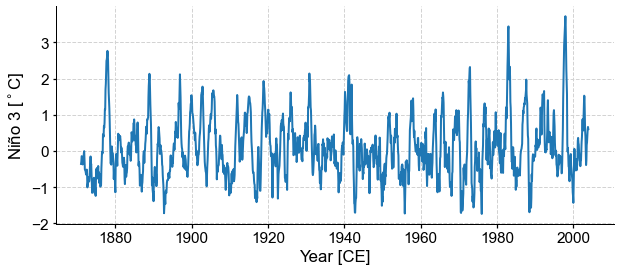

In [6]:
ts_nino.plot()

### Step 2: Pre-processing

Pyleoclim has multiple functionalities to pre-process a timeseries including standardizing, detrending, interpolation. You can learn about the various pre-processing steps in Notebooks `filtering_and_detrending.ipynb`, `data_imputation.ipynb`, and `basic_ts_manipulation.ipynb`. Here, we simply standardize the data and plot it against the original data: 


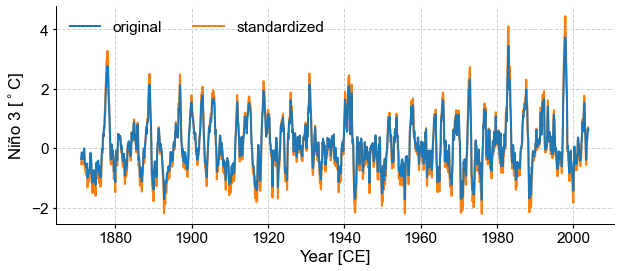

In [9]:
ts_nino_std = ts_nino.standardize()

fig, ax = ts_nino.plot(label='original', zorder=99) 
ax = ts_nino_std.plot(label='standardized', ax=ax, lgd_kwargs={'ncol': 2})

### Step 3: Spectral Analysis

It's simple to perform spectral analysis -- call the `spectral()` method and it will yield a `PSD` (power spectral density) object.
The default method `spectral(method='wwz')` (Weighted Wavelet Z-transform) can handle both evenly-spaced data and unevenly-spaced data, while some other methods like `spectral(method='mtm')` (Multi-Taper Method) can handle only evenly-spaced data.
The `wwz` method is essentially an wavelet tranform algorithm and therefore much slower than the `mtm` method. You can learn more about the methods available in the `wavelet_analysis.ipynb` Tutorial.
For our example data, both methods apply.

In [21]:
psd_wwz = ts_nino_std.spectral()  # method='wwz' by default 
psd_mtm = ts_nino_std.spectral(method='mtm')  # method='mtm' 

We can then plot the results of our analysis:

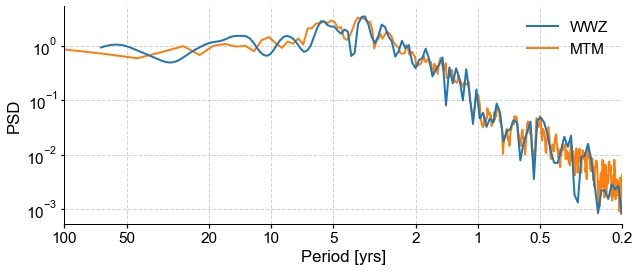

In [23]:
fig, ax = psd_wwz.plot(label='WWZ',zorder=99)
ax = psd_mtm.plot(ax=ax, label='MTM')

To make sense of our result, namely to identify the periodocity of our data, we need to perform some significance test.
Currently, *Pyleoclim* supports the test with AR(1) surrogates, and we can perform the test by simply calling the `signif_test()` method.

In [24]:
psd_mtm_signif = ts_nino_std.spectral(method='mtm').signif_test()

Performing spectral analysis on individual series: 100%|██████████| 200/200 [00:12<00:00, 15.61it/s]


Now if we the plot `psd_mtm_signif` object by calling the `plot()` method, the PSD along with the AR(1) threshold curve will be plotted, based on which we are able to identify the significant cycles.

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Period [yrs]', ylabel='PSD'>)

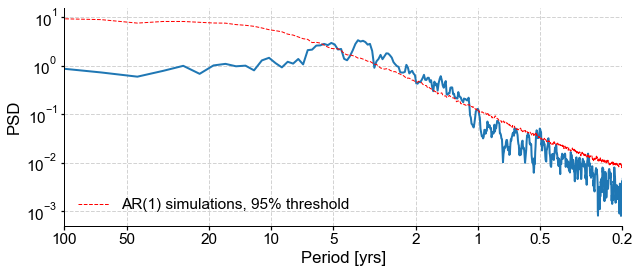

In [25]:
psd_mtm_signif.plot()

### Step 4: Wavelet Analysis

The current version of *Pyleoclim* supports the `wwz` method for wavelet analysis on unevenly spaced records and the `cwt` method for evenly spaced records. `wwz` is more flexible than `cwt` in the sense that it can be used on any record, but is much slower (no free lunch!). To perform wavelet analysis we simply call the `wavelet()` method, and then a `Scalogram` object will be created. Since our data is evenly spaced we'll use `cwt`.

In [18]:
scal = ts_nino_std.wavelet(method='cwt')

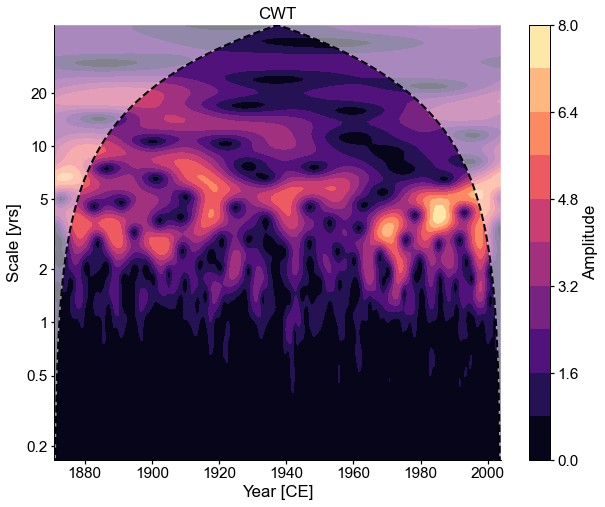

In [20]:
fig, ax = scal.plot(title='CWT')

We can perform significance analysis the same way we did when conducting spectral analysis:

In [26]:
scal_signif = ts_nino_std.wavelet(method='cwt').signif_test()

Performing wavelet analysis on individual series: 100%|██████████| 200/200 [00:04<00:00, 43.04it/s]


In this case, regions of significance (that exceed the 95% confidence threshold found using AR1 surrogates) will be highlighted by a white outline.

(<Figure size 720x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Scalogram with 95% threshold'}, xlabel='Year [CE]', ylabel='Scale [yrs]'>)

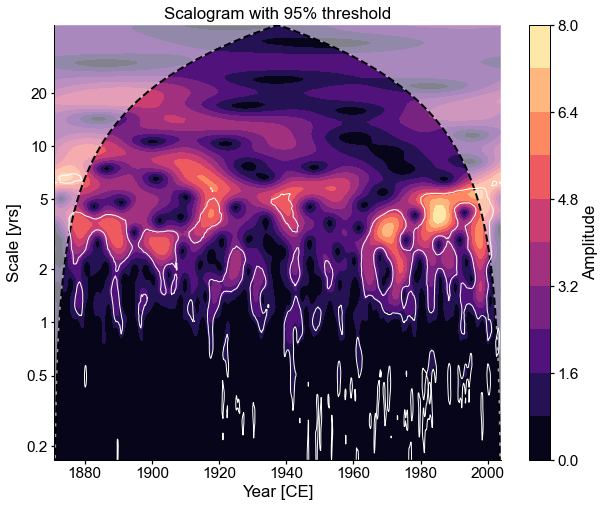

In [27]:
scal_signif.plot()

### One more thing: method cascading

Life is short.`Pyleoclim` provides a very cool feature to make our life easier -- "method cascading". This feature provides the opportunity to perform a multi-step workflow in just one line.

Performing spectral analysis on individual series: 100%|██████████| 200/200 [00:12<00:00, 15.73it/s]


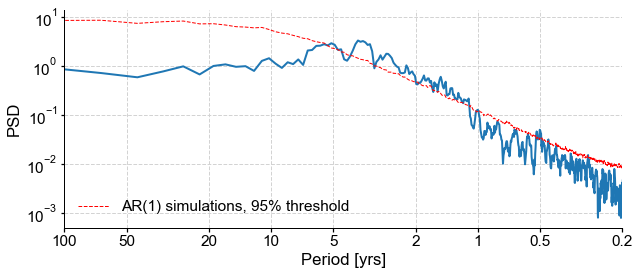

In [28]:
#Spectral analysis with a significance test

fig, ax = ts_nino.standardize().spectral(method='mtm').signif_test().plot()

Performing wavelet analysis on individual series: 100%|██████████| 200/200 [00:04<00:00, 42.09it/s]


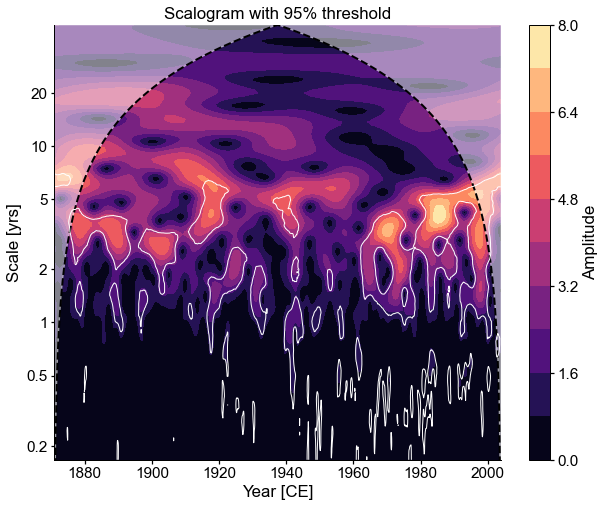

In [30]:
#Wavelet analysis with significance test

fig, ax = ts_nino.standardize().wavelet(method='cwt').signif_test().plot()